# Thông tin
- MSSV: 22521178
- Họ tên: Hoàng Ngọc Quân
- Bài tập: Thực hành Histogrm - BT1
- Ngày thực hiện: 14/3/2024

In [ ]:
# import drive
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [ ]:
import os, sys

In [52]:
COURSE_DIR = '/gdrive/MyDrive/CS231.O21.KHTN.1'
TASK_DIR = os.path.join(COURSE_DIR, 'Baitap', 'Baitap1')
dir_images = os.path.join(TASK_DIR, 'images')

### UT

In [53]:
class ut:
  def __init__(self): pass
  def verbose(flag, verbose, func_dir=""):
      if(flag==False): return
      print("__verbose__", func_dir)
      print(verbose)
  def over(val):
      try: ut.verbose(True, (type(val), val.shape, str(sys.getsizeof(val)) + "Bytes"))
      except Exception as e:
          ut.verbose(True, (type(val), "no-shape", str(sys.getsizeof(val)) + "Bytes"))

### Display Image and His

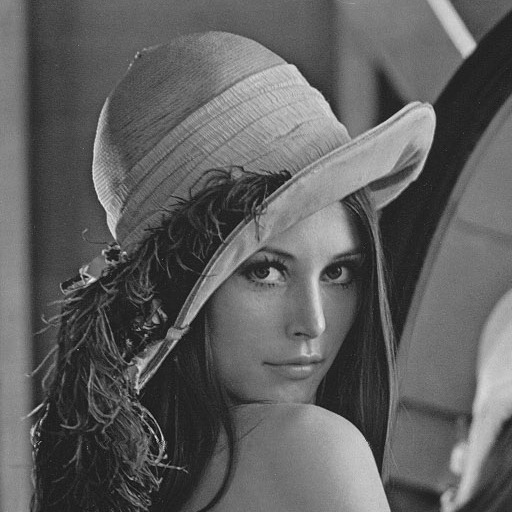

In [54]:
# Khai báo sử dụng thư viện cv
import cv2 as cv2
import matplotlib.pyplot as plt

# Đọc ảnh lena.jpg và chuyển thành ảnh xám
path_filename = os.path.join(dir_images, 'lena.jpg')
img = cv2.imread(path_filename, 0)

# Hiển thị ảnh
from google.colab.patches import cv2_imshow

cv2_imshow(img)

In [55]:
def plot_his_of_image(image, isnorm=True):
    histogram = cv2.calcHist([image.flatten()], channels=[0], mask=None, histSize=[256], ranges=[0, 256])
    # normalize his
    if(isnorm): histogram /=  image.flatten().shape[0]
    # Plot the histogram
    plt.plot(histogram, color='gray')
    plt.xlabel('Pixel Intensity')
    plt.ylabel('Frequency')
    plt.title('Histogram of Image')
    plt.show()

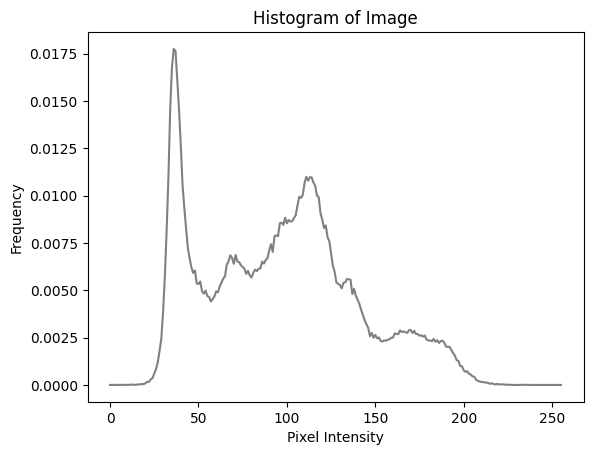

In [56]:
plot_his_of_image(img)

### Read Files & Load Data

In [57]:
import numpy as np

In [58]:
TRAIN_DIR = os.path.join(TASK_DIR, 'traffic_light_data/train')
TEST_DIR = os.path.join(TASK_DIR, 'traffic_light_data/test')

In [ ]:
os.listdir(TRAIN_DIR)

In [60]:
def load_data(TRAIN_DIR):
  his_lis = []
  for file_name in os.listdir(TRAIN_DIR): # get lis file
    path_filename = os.path.join(TRAIN_DIR, file_name) # get file_dir
    image = cv2.imread(path_filename, 0) # read img
    # compute his
    histogram = cv2.calcHist([image.flatten()], channels=[0], mask=None, histSize=[256], ranges=[0, 256])
    histogram /=  image.flatten().shape[0]
    his_lis.append(histogram)

  train = np.array(his_lis)
  train = train.reshape(train.shape[0], train.shape[1])
  ut.over(train)
  return train

In [61]:
train = load_data(TRAIN_DIR)
test = load_data(TEST_DIR)

__verbose__ 
(<class 'numpy.ndarray'>, (80, 256), '128Bytes')
__verbose__ 
(<class 'numpy.ndarray'>, (12, 256), '128Bytes')


##### predict

In [62]:
# compute dist
from scipy.spatial.distance import cdist
dis = cdist(test, train, 'euclidean')
ut.over(dis)

__verbose__ 
(<class 'numpy.ndarray'>, (12, 80), '7808Bytes')


In [63]:
train_names = os.listdir(TRAIN_DIR)
test_names = os.listdir(TEST_DIR)
for i in range(test.shape[0]):
  idx = 0
  for j in range(train.shape[0]):
    if(dis[i, j] < dis[i, idx]): idx = j
  print(test_names[i], ":", train_names[idx], "__", dis[i, idx])

back_3.jpg : green_19.jpg __ 0.18568692919495755
red_1.png : red_13.png __ 0.10449834862349039
green_3.jpg : green_18.jpg __ 0.10401871561065154
yellow_1.png : yellow_19.png __ 0.15780476466190746
back_2.jpg : green_13.jpg __ 0.1504715230707073
yellow_6.jpg : green_18.jpg __ 0.10575389087034257
back_1.jpg : green_19.jpg __ 0.1459842338736394
yellow_5.jpg : green_13.jpg __ 0.09984822101717183
green_2.jpg : green_15.jpg __ 0.08869526439104536
red_2.png : red_14.png __ 0.08898058498378558
red_3.png : red_13.png __ 0.08445543258737596
green_1.jpg : green_12.jpg __ 0.09283026485802015


##### predict2

In [64]:
# compute dist
from scipy.spatial.distance import cdist
dis = cdist(test, train, 'cosine')
ut.over(dis)

train_names = os.listdir(TRAIN_DIR)
test_names = os.listdir(TEST_DIR)
for i in range(test.shape[0]):
  idx = 0
  for j in range(train.shape[0]):
    if(dis[i, j] < dis[i, idx]): idx = j
  print(test_names[i], ":", train_names[idx], "__", dis[i, idx])

__verbose__ 
(<class 'numpy.ndarray'>, (12, 80), '7808Bytes')
back_3.jpg : green_16.jpg __ 0.2837321413473297
red_1.png : red_9.png __ 0.3429810762680836
green_3.jpg : yellow_12.jpg __ 0.3682968209549783
yellow_1.png : yellow_18.png __ 0.5509867465564342
back_2.jpg : green_13.jpg __ 0.2107174487154566
yellow_6.jpg : green_18.jpg __ 0.4414152797327625
back_1.jpg : green_1.jpg __ 0.17818159331040306
yellow_5.jpg : yellow_3.png __ 0.4298783923176511
green_2.jpg : green_15.jpg __ 0.2993629801504647
red_2.png : red_14.png __ 0.2505236493371926
red_3.png : red_13.png __ 0.2331339680727964
green_1.jpg : green_12.jpg __ 0.32451831694842714


In [65]:
os.listdir(TEST_DIR)

['back_3.jpg',
 'red_1.png',
 'green_3.jpg',
 'yellow_1.png',
 'back_2.jpg',
 'yellow_6.jpg',
 'back_1.jpg',
 'yellow_5.jpg',
 'green_2.jpg',
 'red_2.png',
 'red_3.png',
 'green_1.jpg']